<p style="text-align: center;font-size:50px;">M. Ammar Siddique <br> BSDSF22M041</p>


<p style="text-align: center;font-size:50px;">Data Mining and Machine Learning </p>


<p style="text-align: center;font-size:50px;">Assignment # 6 </p>

                                                         
<p style="text-align: center;font-size:40px;">Heart Attack Prediction data set </p>

## Implementation

Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94        40
           1       1.00      0.92      0.96        60

    accuracy                           0.95       100
   macro avg       0.94      0.96      0.95       100
weighted avg       0.96      0.95      0.95       100



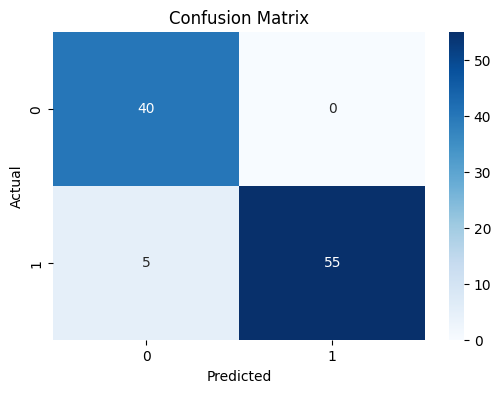

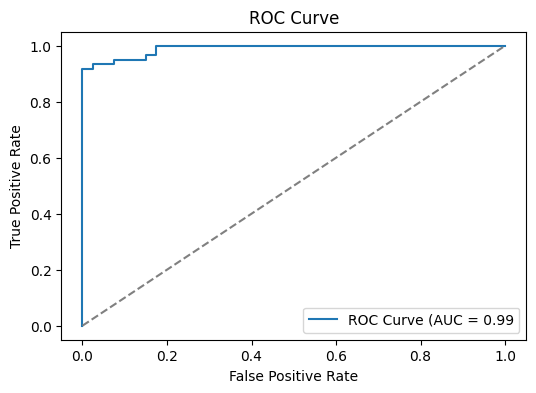

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# Load the dataset
df = pd.read_csv("Heart_Prediction_Quantum_Dataset.csv")

# Check for missing values
df.fillna(df.median(), inplace=True)  # Fill missing values with median

# Define features and target variable
X = df.drop(columns=["HeartDisease"])
y = df["HeartDisease"]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f}')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
